In [1]:
# Import labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3281,ham,Hey you around? I've got enough for a half + t...,NaN,NaN,NaN
3453,ham,I dont have any of your file in my bag..i was ...,NaN,NaN,NaN
1284,ham,But if she.s drinkin i'm ok.,NaN,NaN,NaN
1029,ham,"Its good, we'll find a way",NaN,NaN,NaN
813,ham,I borrow ur bag ok.,NaN,NaN,NaN
4453,ham,I'm home. Ard wat time will u reach?,NaN,NaN,NaN
4099,ham,I not at home now lei...,NaN,NaN,NaN
3665,ham,I'm turning off my phone. My moms telling ever...,NaN,NaN,NaN
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...,NaN,NaN,NaN
5523,ham,Going to join tomorrow.,NaN,NaN,NaN


In [4]:
# Shape of data
df.shape

(5572, 5)

## There are few stage to check the dataset

#### 1. Data cleaning

#### 2. EDA

#### 3. Data preprocessing

#### 4. Model building and model evaluation

#### 5. Model improvement


## 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 ,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
# Rename cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head(8)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


In [8]:
# Check missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check duplication
df.duplicated().sum()

403

In [10]:
# Remove duplicate values
df = df.drop_duplicates(keep='first')

In [11]:
# Check duplication
df.duplicated().sum()

0

In [12]:
# Check shape
df.shape

(5169, 2)

In [13]:
# Apply label encoder on target col
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [14]:
df['target']= en.fit_transform(df['target'])

In [15]:
df.head(8)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...


## 2. EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

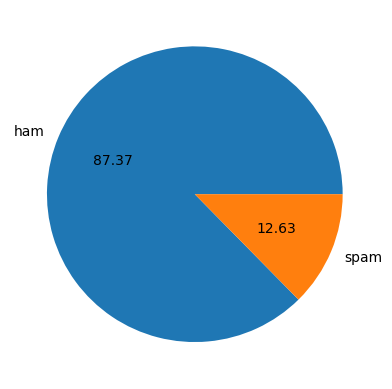

This show that Data is Imbalanced


In [17]:
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct= '%.2f')
plt.show()
print('This show that Data is Imbalanced')

In [18]:
# Now we download nlpk
# !pip3 install nltk

In [19]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [20]:
# Num of characters
df['num_characters'] = df['text'].apply(len)
df.head(8)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160


In [21]:
# Num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(8)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31


In [22]:
# Num of sentence
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(8)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2


In [23]:
# Relationship
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# ham msg
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# spam msg
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [26]:
import seaborn as sns

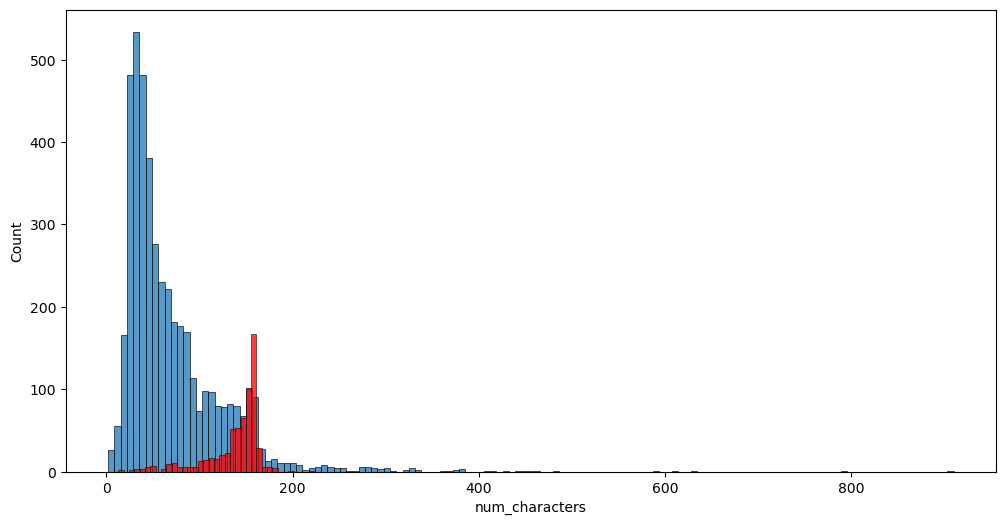

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color= 'red')
plt.show()

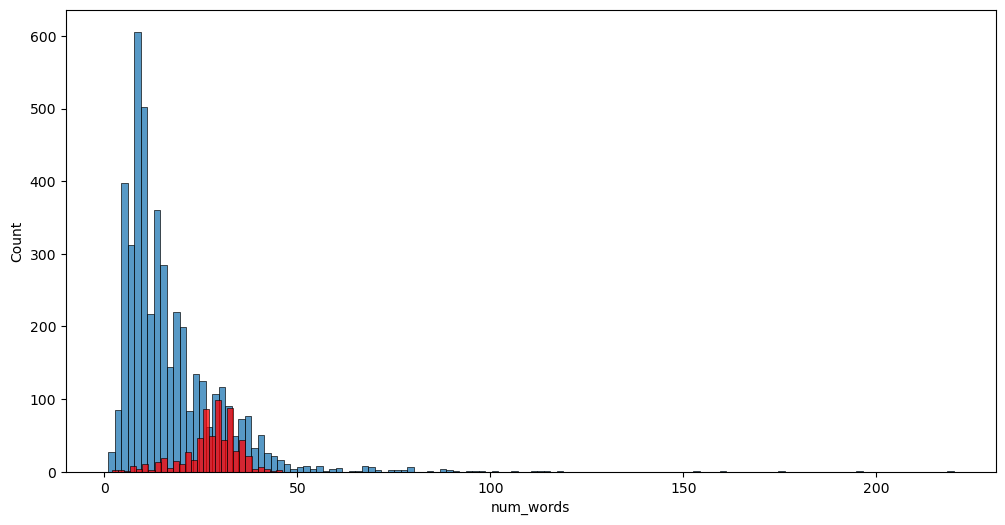

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')
plt.show()

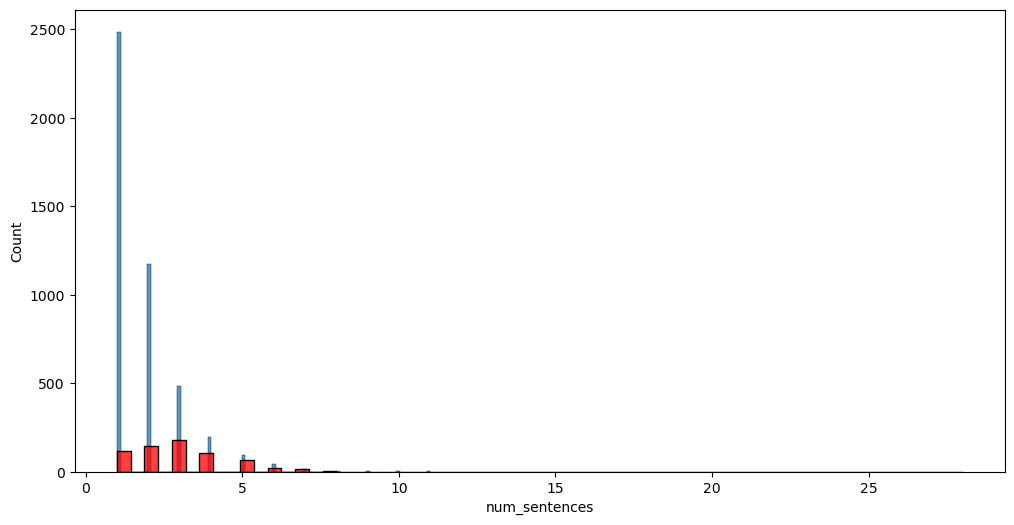

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color= 'red')
plt.show()

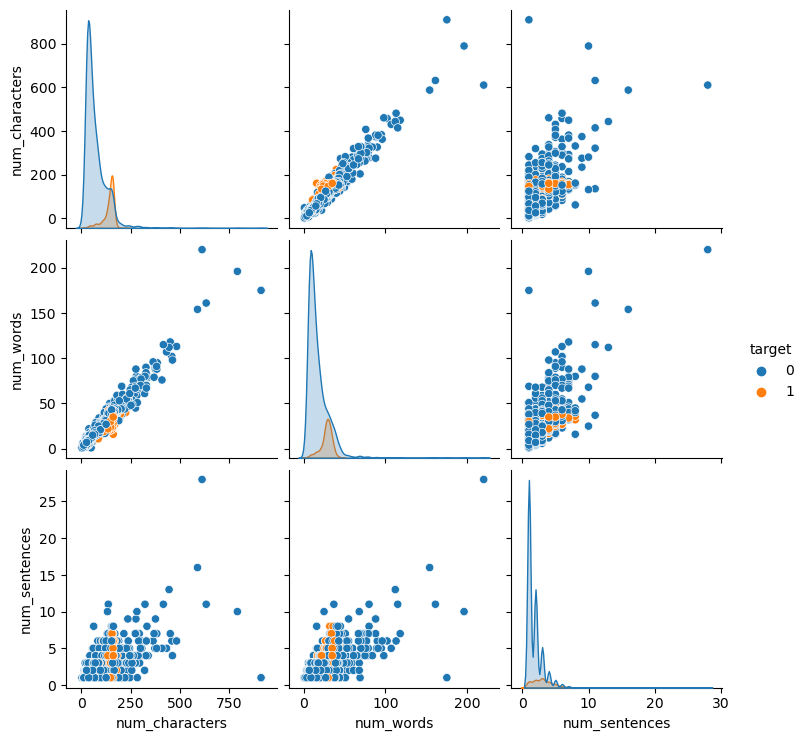

In [30]:
sns.pairplot(df, hue= 'target')
plt.show()

<AxesSubplot:>

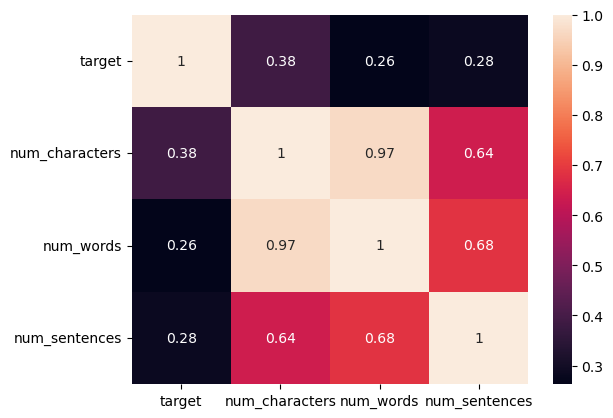

In [31]:
sns.heatmap(df.corr(), annot=True)

## 3. Data preprocessing

- Lower case
- Tokenization
- Removing special character
- Removing stop words and punctuation
- Stemming

In [32]:
# Stop words
from nltk.corpus import stopwords

In [33]:
# Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
# Data preprocessing Function 
def transform_txt(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) 
    
    return " ".join(y)

In [36]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
transform_txt('I loved the YT lectures on Machine Learning. What about you?')

'love yt lectur machin learn'

In [38]:
transform_txt('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['transformed_txt'] = df['text'].apply(transform_txt)
df.head(8)

,target,text,num_characters,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...


In [40]:
# !pip3 install wordcloud

In [41]:
# Make wordCloud
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color = 'white')

In [42]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].str.cat(sep=' '))

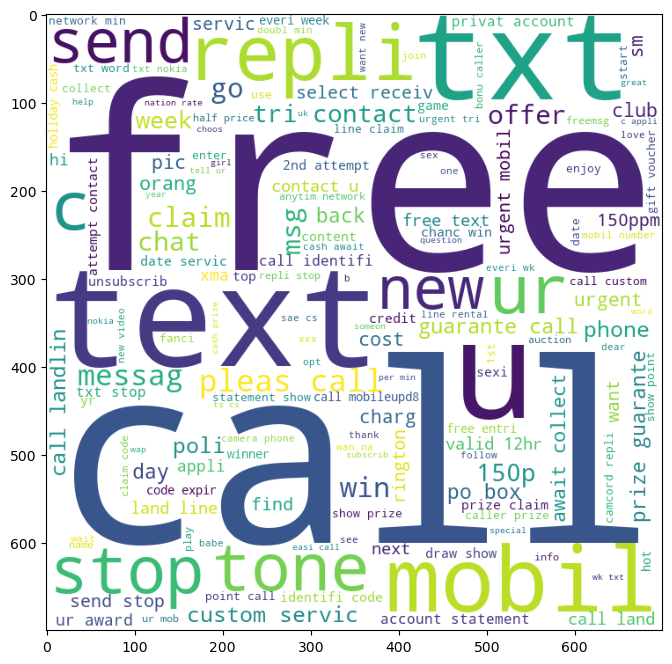

In [43]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [44]:
ham_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].str.cat(sep=' '))

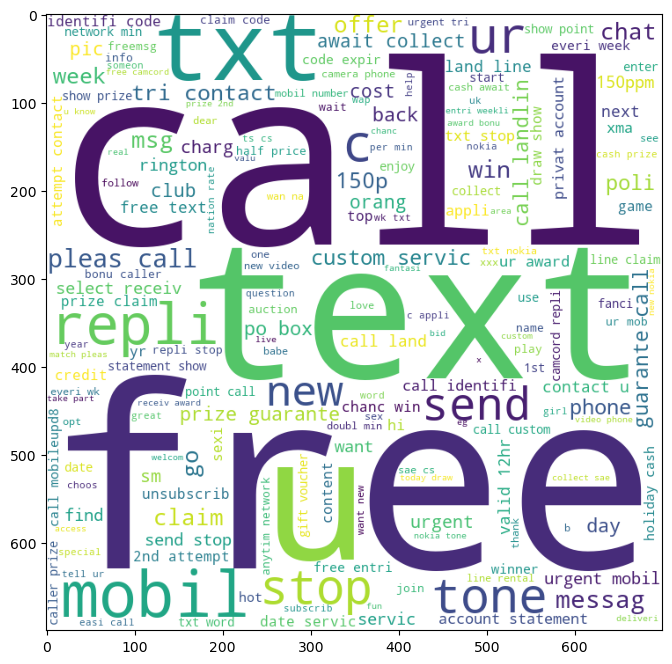

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [46]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


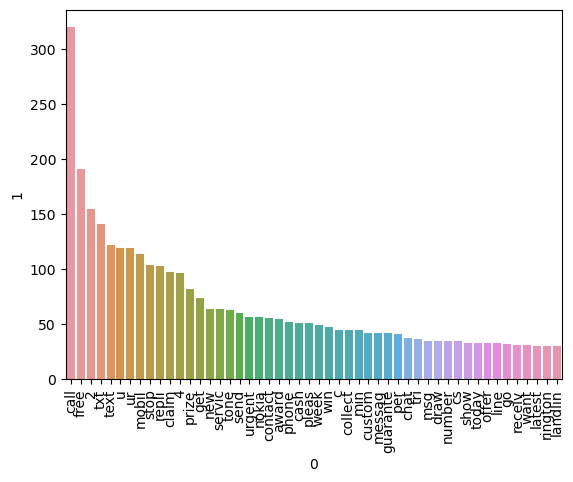

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [49]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35394

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


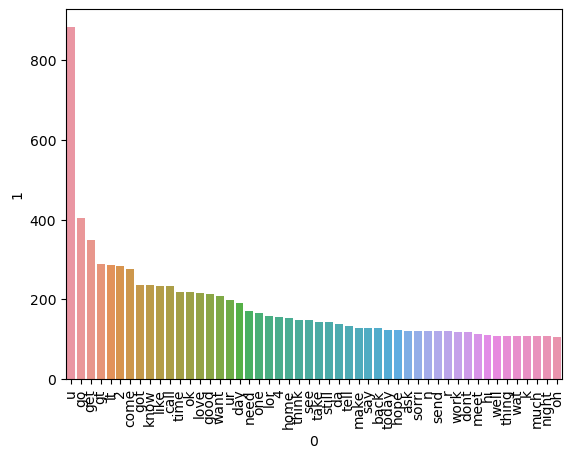

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0], pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation= 'vertical')
plt.show()

## 4. Model Building

In [52]:
df.head(8)

,target,text,num_characters,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=6000)

In [54]:
# X = cv.fit_transform(df['transformed_txt']).toarray()
X = tfidf.fit_transform(df['transformed_txt']).toarray()

In [55]:
# Scalling
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X = scaler.fit_transform(X)

In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(5169, 6000)

In [58]:
y = df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [64]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [65]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9738878143133463
0.9663865546218487
[[892   4]
 [ 23 115]]


In [66]:
# Some Extra model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [67]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
# dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [68]:
clfs = {
    'LRC' : lrc,
    'SVC' : svc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'ETC' : etc,
    'XGB' : xgb,
    'MNB' : mnb,
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LRC
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KNC
Accuracy -  0.902321083172147
Precision -  1.0
For  RFC
Accuracy -  0.9758220502901354
Precision -  0.991304347826087
For  ABC
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  XGB
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419
For  MNB
Accuracy -  0.9593810444874274
Precision -  1.0


In [72]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
2,KNC,0.902321,1.000000
7,MNB,0.959381,1.000000
3,RFC,0.975822,0.991304
5,ETC,0.975822,0.974790
1,SVC,0.974855,0.974576
4,ABC,0.965184,0.955357
0,LRC,0.952611,0.949495
6,XGB,0.970986,0.935484


In [74]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [75]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.902321
1,MNB,Accuracy,0.959381
2,RFC,Accuracy,0.975822
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.974855
5,ABC,Accuracy,0.965184
6,LRC,Accuracy,0.952611
7,XGB,Accuracy,0.970986
8,KNC,Precision,1.000000
9,MNB,Precision,1.000000


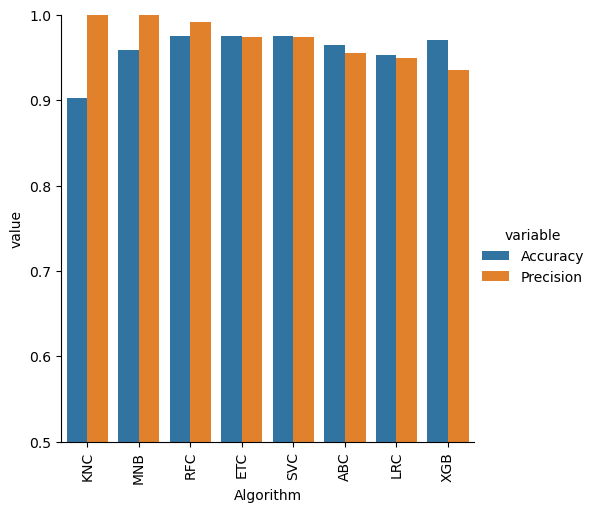

In [76]:
sns.catplot(x='Algorithm', y='value', hue='variable',
           data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model improvement

In [77]:
# Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_6k': accuracy_scores, 'Precision_max_ft_6k': precision_scores }).sort_values('Precision_max_ft_6k',ascending=False)

In [78]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [79]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_6k,Precision_max_ft_6k
0,KNC,0.902321,1.000000,0.902321,1.000000
1,MNB,0.959381,1.000000,0.959381,1.000000
2,RFC,0.975822,0.991304,0.975822,0.991304
3,ETC,0.975822,0.974790,0.975822,0.974790
4,SVC,0.974855,0.974576,0.974855,0.974576
5,ABC,0.965184,0.955357,0.965184,0.955357
6,LRC,0.952611,0.949495,0.952611,0.949495
7,XGB,0.970986,0.935484,0.970986,0.935484


In [80]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

mnb = MultinomialNB()
knn = KNeighborsClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [81]:
voting = VotingClassifier(estimators=[('nb',mnb), ('knc', knn), ('svm', svc), ('et', etc)], voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('knc', KNeighborsClassifier()),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred = voting.predict(X_test)
print('Accuracy -', accuracy_score(y_test, y_pred))
print('Precision -', precision_score(y_test, y_pred))

Accuracy - 0.9680851063829787
Precision - 1.0
